## J2 Reqs

[J2 LED Flashlight](https://j2ledflashlight.com/) is a trusted expert and authorized seller of premium LED light products and accessories.  


<br>
<div>
    <img src="j2-audience.png" width=800 />
</div>
<br>

<br>
<div>
    <img src="j2-team.jpg" width=800 />
</div>
<br>

They sell the brands:

- Fenix
- Olight
- Nitecore
- JETBeam
- EagleTac

Our goal is to provide them some useful insights to help them improve their online presence.  If our ABSA aspect-sentiment tool can inform their advertising strategy for target products - website, promotions, creative copy, target segments, a/b experiments - then J2 can increase their brand awareness and sales.  They are working with [Digital Main Street](https://digitalmainstreet.ca/).  We are a partner to help them along.

We want to get the learnings from quality reviews that would help J2 sell direct to consumer for everyday carry, hunting, camping use cases, as well as get contracts with camp sites, business military and law enforcement.

Heatmap stuff here...

In [21]:
import pandas as pd
import ast 
import collections
import operator
import numpy as np

In [22]:
!ls -lh -S main_product/ | head -5

total 23808
-rwxr-xr-x@ 1 kushthaker  staff   3.8M 28 Oct 00:13 B06VTLLC13.csv
-rwxr-xr-x@ 1 kushthaker  staff   2.8M 28 Oct 01:39 B07X5TTTJT.csv
-rwxr-xr-x@ 1 kushthaker  staff   1.3M 28 Oct 00:35 B01J8B219O.csv
-rwxr-xr-x@ 1 kushthaker  staff   1.0M 28 Oct 00:51 B07568DFCH.csv


In [23]:
df1 = pd.read_csv('main_product/B06VTLLC13.csv')
df2 = pd.read_csv('main_product/B07X5TTTJT.csv')

In [24]:
df1.columns == df2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [25]:
!ls main_product/ > lights.txt

In [26]:
with open('lights.txt','r') as l:
    csvs = [f.strip() for f in l.read().split('\n') if f != '']
    
df = pd.read_csv('main_product/' + csvs[0])
    
for csv in csvs[1:]:
    df = pd.concat([df, pd.read_csv('main_product/' + csv)])

In [27]:
import sys; print(sys.getsizeof(df) * 1.e-6, 'MB')

25.55379 MB


In [28]:
df.columns

Index(['Unnamed: 0', 'author_id', 'verified_purchase', 'review_title',
       'reviews', 'country', 'date', 'reviewer_name', 'ratings',
       'people_find_helpful', 'start_time', 'end_time', 'product_name',
       'average_rating', 'total_reviews', 'product_category', 'product_id',
       'meta_data', 'rank'],
      dtype='object')

In [29]:
def get_mass(dim_string):
    if dim_string == 0:
        return 0.00
    else:
        grams = np.array(dim_string.split(';')[1].split(' ')[1]).astype(np.float)
        grams = np.prod(grams)
        return np.around(grams,2)

def get_volume(dim_string):
    if dim_string == 0:
        return 0.00
    # get density of flashlight in grams / m^3 
    else:
        dims = [dim.strip() for dim in dim_string.split(';')[0].split('x')]
        dims[-1] = dims[-1][:-3]
        dims = np.array(dims).astype(np.float)
        volume_m = np.prod(dims) / 100 # convert metres
        return np.around(volume_m,2)

In [30]:
def convert_meta_to_dict(row):
    row['meta'] = ast.literal_eval(row.meta)
    return row

def add_mass(row):
    row['mass'] = get_mass(row.meta.get('product dimensions',0))
    return row

def add_volume(row):
    row['volume'] = get_volume(row.meta.get('product dimensions',0))
    return row

In [31]:
df_products = pd.DataFrame({'id':df.product_id.unique(), 'product':df.product_name.unique(), 'meta':[meta for meta in df.meta_data.unique() if type(meta) == str ]})
df_products = df_products.apply(convert_meta_to_dict, axis=1)
df_products = df_products.apply(add_mass, axis=1)
df_products = df_products.apply(add_volume, axis=1)

In [32]:
df_products

,id,product,meta,mass,volume
0,B000LJWV4S,Streamlight 90512 Survivor LED Flashlight with...,"{'manufacturer': 'Streamlight', 'part number':...",0.00,0.00
1,B002XTCAXG,Streamlight 75883 Stinger DS LED HP High Power...,"{'manufacturer': 'Streamlight', 'part number':...",453.59,7.66
2,B00GZYNX8G,NiteCore P12 2015 Version 1000 Lumens Precise ...,{'product dimensions': '13.89 x 2.54 x 2.54 cm...,90.72,0.90
3,B00OYKXTDW,Nitecore EA41 1020 Lumen Cree XM-L2 U2 LED Fla...,"{'manufacturer': 'Nitecore', 'part number': 'W...",170.10,2.05
4,B010ESCLHW,"Fenix Flashlights FX-PD35TAC Flashlight, 1000 ...","{'manufacturer': 'Open Air Brands', 'part numb...",89.00,2.95
5,B01J8B219O,"Tactical Flashlight, YIFENG XML T6 Ultra Brigh...","{'manufacturer': 'YIFeNG', 'part number': 'XLM...",290.00,6.60
6,B06VTLLC13,"Streamlight 88065 Pro Tac HL-X 1,000 Lumen Pro...","{'manufacturer': 'Streamlight', 'part number':...",113.40,1.28
7,B07568DFCH,"Morpilot UV Flashlight, LED Handheld Flashligh...",{'product dimensions': '13.2 x 3.6 x 3.6 cm; 1...,131.54,1.71
8,B07DQKV38W,Olight I3T EOS 180 Lumens Dual-Output Slim EDC...,"{'manufacturer': 'Olight Technology Co.Ltd', '...",40.82,0.20
9,B07G3SJPLZ,Olight S1R II 1000 Lumens High Performance CW ...,"{'manufacturer': 'Olight Co,.Ltd', 'part numbe...",49.90,0.28


next steps get Brand, Lumens, Price...

In [33]:
df_price = pd.read_csv('anshuk-products.csv')
df_price = df_price[['Price','Company','Link']]
df_price = df_price.loc[df_price['Link'].isna() == False]

In [34]:
import re

pattern = re.compile(r'/([a-zA-Z0-9]{10})(?:[/?]|$)')

def get_asin(url):
    asin = ([m.group(0) for m in pattern.finditer(url)][0]).replace('/','')
    return asin

def add_asin(row):
    row['id'] = get_asin(row.Link)
    return row

def get_CDN_dollars(row):
    row['price'] = np.array(row.price.replace('$','')).astype(np.float)
    return row

In [35]:
df_price = df_price.apply(add_asin, axis=1)

In [36]:
df_products = pd.merge(df_products, df_price, how='left', on='id')
df_products = df_products.rename(columns={'Price':'price','Company':'brand','Link':'page_url'})
df_products = df_products[['id','product','meta','brand','price','mass','volume','page_url']]
df_products = df_products.apply(get_CDN_dollars, axis=1)

df_products

,id,product,meta,brand,price,mass,volume,page_url
0,B000LJWV4S,Streamlight 90512 Survivor LED Flashlight with...,"{'manufacturer': 'Streamlight', 'part number':...",Streamlight,259.0,0.00,0.00,https://www.amazon.ca/Streamlight-90512-Surviv...
1,B002XTCAXG,Streamlight 75883 Stinger DS LED HP High Power...,"{'manufacturer': 'Streamlight', 'part number':...",Streamlight,226.0,453.59,7.66,https://www.amazon.ca/Streamlight-75883-Rechar...
2,B00GZYNX8G,NiteCore P12 2015 Version 1000 Lumens Precise ...,{'product dimensions': '13.89 x 2.54 x 2.54 cm...,Nitecore,110.0,90.72,0.90,https://www.amazon.ca/NiteCore-Version-Tactica...
3,B00OYKXTDW,Nitecore EA41 1020 Lumen Cree XM-L2 U2 LED Fla...,"{'manufacturer': 'Nitecore', 'part number': 'W...",Nitecore,150.0,170.10,2.05,https://www.amazon.ca/Nitecore-Flashlight-Sear...
4,B010ESCLHW,"Fenix Flashlights FX-PD35TAC Flashlight, 1000 ...","{'manufacturer': 'Open Air Brands', 'part numb...",Fenix,113.0,89.00,2.95,https://www.amazon.ca/Fenix-Flashlights-FX-PD3...
5,B01J8B219O,"Tactical Flashlight, YIFENG XML T6 Ultra Brigh...","{'manufacturer': 'YIFeNG', 'part number': 'XLM...",Yifeng,19.0,290.00,6.60,https://www.amazon.ca/Tactical-Flashlight-YIFE...
6,B06VTLLC13,"Streamlight 88065 Pro Tac HL-X 1,000 Lumen Pro...","{'manufacturer': 'Streamlight', 'part number':...",Streamlight,125.0,113.40,1.28,https://www.amazon.ca/Streamlight-88065-Profes...
7,B07568DFCH,"Morpilot UV Flashlight, LED Handheld Flashligh...",{'product dimensions': '13.2 x 3.6 x 3.6 cm; 1...,Morpilot,24.0,131.54,1.71,https://www.amazon.ca/Flashlight-Tactical-Morp...
8,B07DQKV38W,Olight I3T EOS 180 Lumens Dual-Output Slim EDC...,"{'manufacturer': 'Olight Technology Co.Ltd', '...",Olight,57.0,40.82,0.20,https://www.amazon.ca/Olight-I3T-Dual-Output-F...
9,B07G3SJPLZ,Olight S1R II 1000 Lumens High Performance CW ...,"{'manufacturer': 'Olight Co,.Ltd', 'part numbe...",Olight,88.0,49.90,0.28,https://www.amazon.ca/Performance-IMR16340-Rec...


In [37]:
for idx, row in df_products.iterrows():
    print(row['product'], '\n\n', row['meta'], '\n\n')

Streamlight 90512 Survivor LED Flashlight with AC Fast Charger, Yellow 

 {'manufacturer': 'Streamlight', 'part number': '90512', 'item model number': '90512', 'is discontinued by manufacturer': 'No', 'size': 'FastCharger; 120V AC', 'colour': 'Yellow', 'style': 'With 120V AC Fast Charger', 'item package quantity': '1', 'type of bulb': 'LED', 'included components': 'Unit^Instruction Guide', 'batteries included?': 'Yes', 'batteries required?': 'Yes', 'warranty description': 'Limited lifetime warranty', 'item weight': '1 kg'} 


Streamlight 75883 Stinger DS LED HP High Power Rechargeable Flashlight with 120-Volt AC Piggy-Back Charger 

 {'manufacturer': 'Streamlight', 'part number': '75883', 'product dimensions': '24.51 x 5.59 x 5.59 cm; 453.59 Grams', 'batteries': '1 Product Specific batteries required. (included)', 'item model number': '75883', 'colour': 'Black', 'style': '120V AC Piggyback Charger', 'power source': 'Battery-Powered', 'item package quantity': '1', 'type of bulb': 'LED',

In [38]:
df.iterrow

Object `df_products.concat` not found.


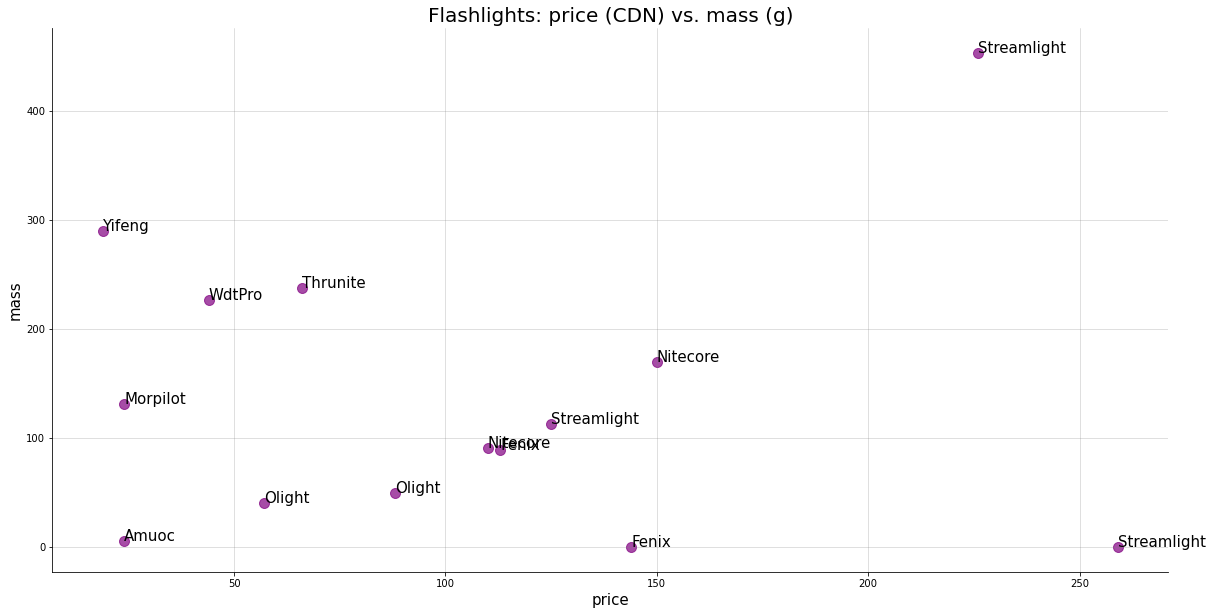

In [104]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def scatter_plot(df, x, y, txt):
    fig, ax = plt.subplots()
    df.plot('price', 'mass', kind='scatter', ax=ax, s=100, c='purple', alpha=0.70)
    
    for idx, j in df_products.iterrows():
        ax.annotate(j[txt], (j[x],j[y]), fontsize=15)
    
    ax.set_title('Flashlights: price (CDN) vs. mass (g)', fontsize=20)
    ax.set_xlabel(x, fontsize=15)
    ax.set_ylabel(y, fontsize=15)
    
    #removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #grid
    ax.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

    plt.rcParams["figure.figsize"] = (20,10)
    fig.canvas.draw()
    

scatter_plot(df_products, 'price', 'mass', 'brand')

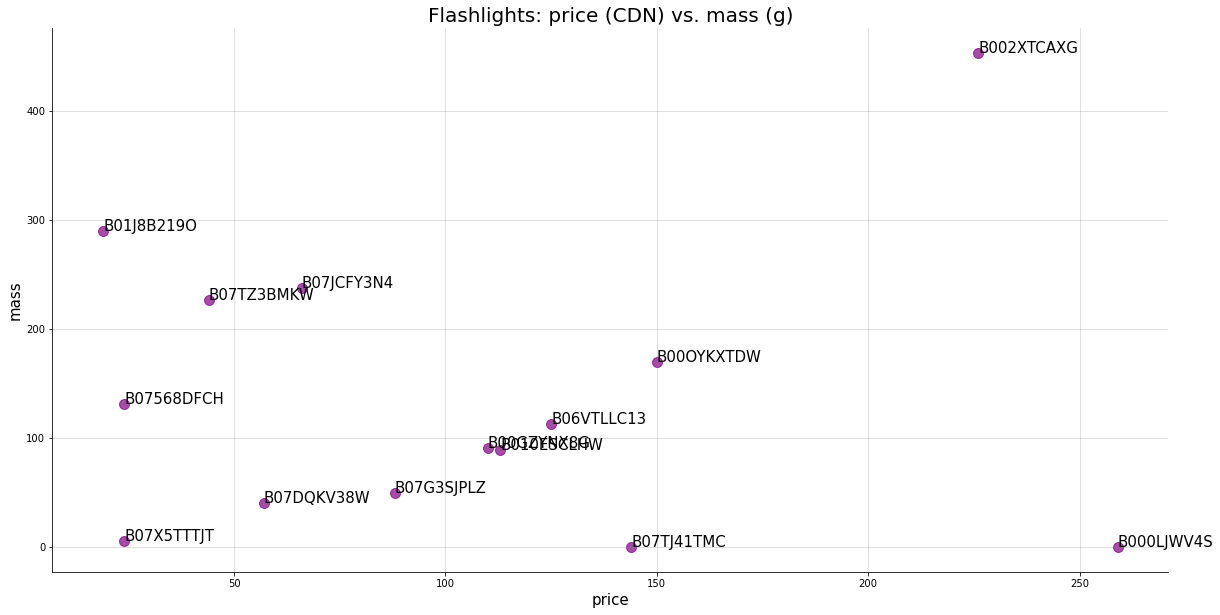

In [105]:
scatter_plot(df_products, 'price', 'mass', 'id')

In [238]:
# name = df_products.sample(1)['product'].values[0]
# meta = df_products.sample(1)['meta'].values[0]

# print(name, '\n\n')
# print(meta)

# df_products = df_products.apply(get_brightness, axis=1).dropna()
    
# def get_brand(row):
#     ast.literal_eval(row.meta).get('brand',0) != 0:




# [ast.literal_eval(a).get('manufacturer') for a in df_products.meta.values]
# [ast.literal_eval(a).get('brand') for a in df_products.meta.values]
# [a for a in df_products.meta.values if ast.literal_eval(a).get('brightness') is not None]


# ast.literal_eval(df_products.sample(1).meta.values[0])
# df_products = df_products.apply(get_meta, axis=1)